In [1]:
data = read.csv(url("https://open.canada.ca/data/dataset/3ac0d080-6149-499a-8b06-7ce5f00ec56c/resource/3acf79c0-a5f5-4d9a-a30d-fb5ceba4b60a/download/service_inventory.csv"), na.strings = c("ND", "NA"))

In [2]:
data=data[-c(3,4,10:13,15,16,18,20,22,35,36,37)]

In [3]:
# Code by Aaron
library(dplyr)
data = data %>% as_tibble() %>% mutate(across(online_applications:other_applications, as.numeric))


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




[1] "Agriculture and Agri-Food Canada"                   
 [2] "Canada Border Services Agency"                      
 [3] "Canadian Food Inspection Agency"                    
 [4] "Immigration, Refugees and Citizenship Canada"       
 [5] "Canada Revenue Agency"                              
 [6] "Canada School of Public Service"                    
 [7] "Employment and Social Development Canada"           
 [8] "Innovation, Science and Economic Development Canada"
 [9] "Public Services and Procurement Canada"             
[10] "Shared Services Canada"                             
[11] "Veterans Affairs Canada"

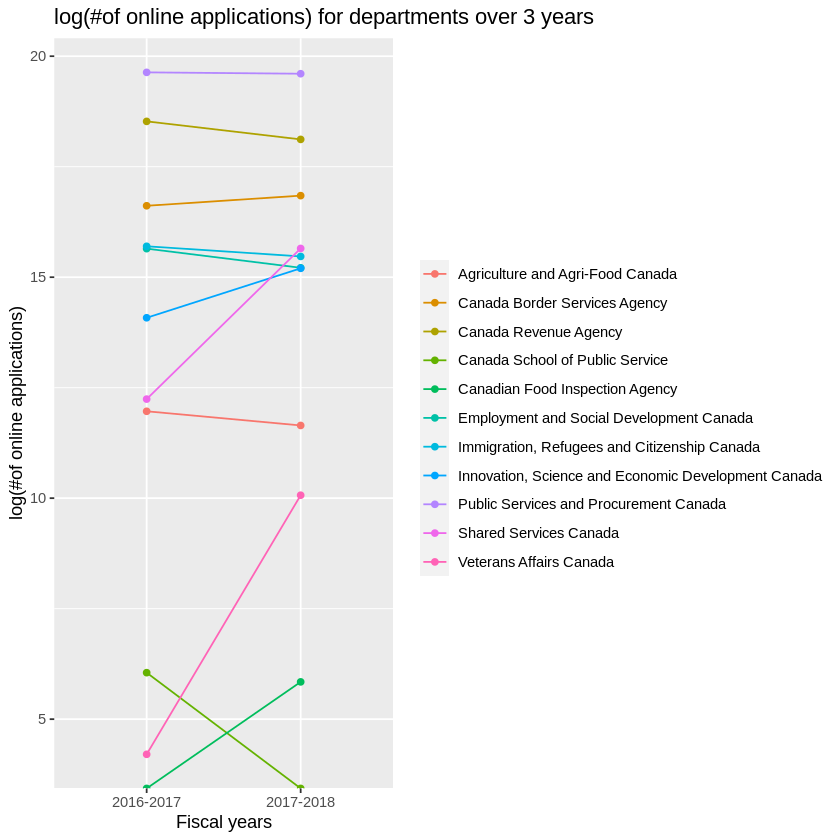

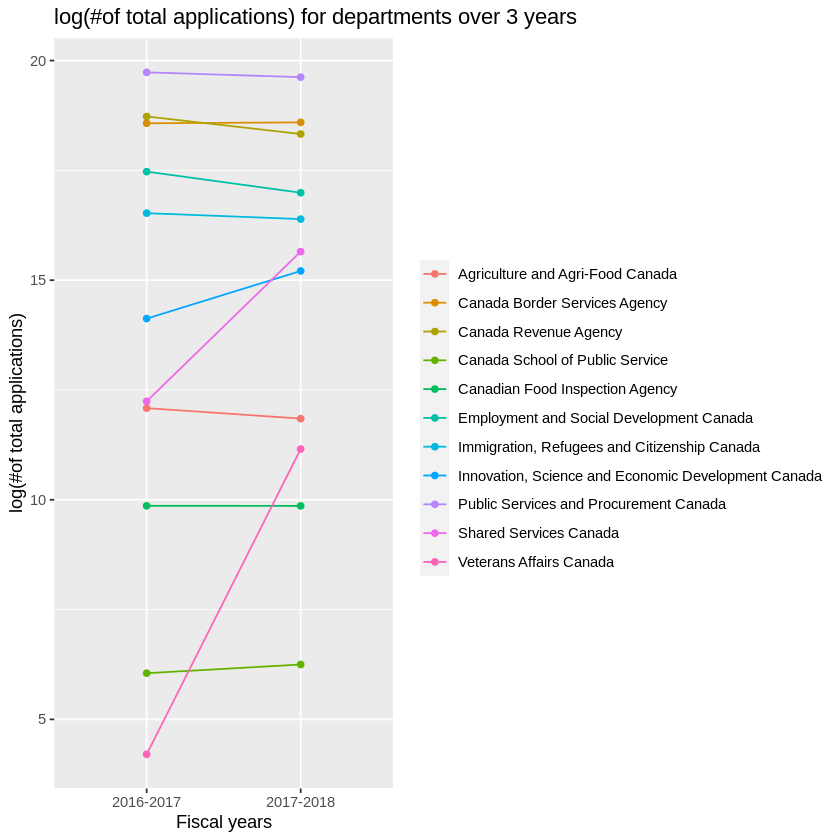

In [5]:
# select 11 deparments with records in 3 fiscal years
data1=unique(data[which(data$fiscal_yr==data$fiscal_yr[1]),]$department_name_en)
data2=unique(data[which(data$fiscal_yr==data$fiscal_yr[2]),]$department_name_en)
data3=unique(data[which(data$fiscal_yr==data$fiscal_yr[3]),]$department_name_en)
inter=intersect(data1,data2)
dep=intersect(inter,data3)
# only remain data with 11 departments
data=data[which(data$department_name_en %in% dep),]

# drop the last year because of large NDs
data=data[-which(data$fiscal_yr=="2018-2019"),]


# sum the number of online applications(can be anything) by departent and year
a=aggregate(data$online_applications, by=list(data$department_name_en, data$fiscal_yr), FUN=sum, na.rm=TRUE)
library(ggplot2)
ggplot(a, aes(x=Group.2, y=log(x), group=Group.1, color=Group.1)) +
geom_line()+geom_point()+ggtitle("log(#of online applications) for departments over 3 years")+
xlab("Fiscal years")+ylab("log(#of online applications)")+theme(legend.title = element_blank(), legend.position = "right", legend.background = element_rect(fill = "transparent"))

# compute total applications for each row
data[,24]=data$in_person_applications+data$postal_mail_applications+data$other_applications+data$online_applications
colnames(data)[24]="sum"
# sum the number of total applications by department and year
b=aggregate(data$sum, by=list(data$department_name_en, data$fiscal_yr), FUN=sum, na.rm=TRUE)
ggplot(b, aes(x=Group.2, y=log(x), group=Group.1, color=Group.1)) +
  geom_line()+geom_point()+ggtitle("log(#of total applications) for departments over 3 years")+
  xlab("Fiscal years")+ylab("log(#of total applications)")+theme(legend.title = element_blank(), legend.position = "right", legend.background = element_rect(fill = "transparent"))



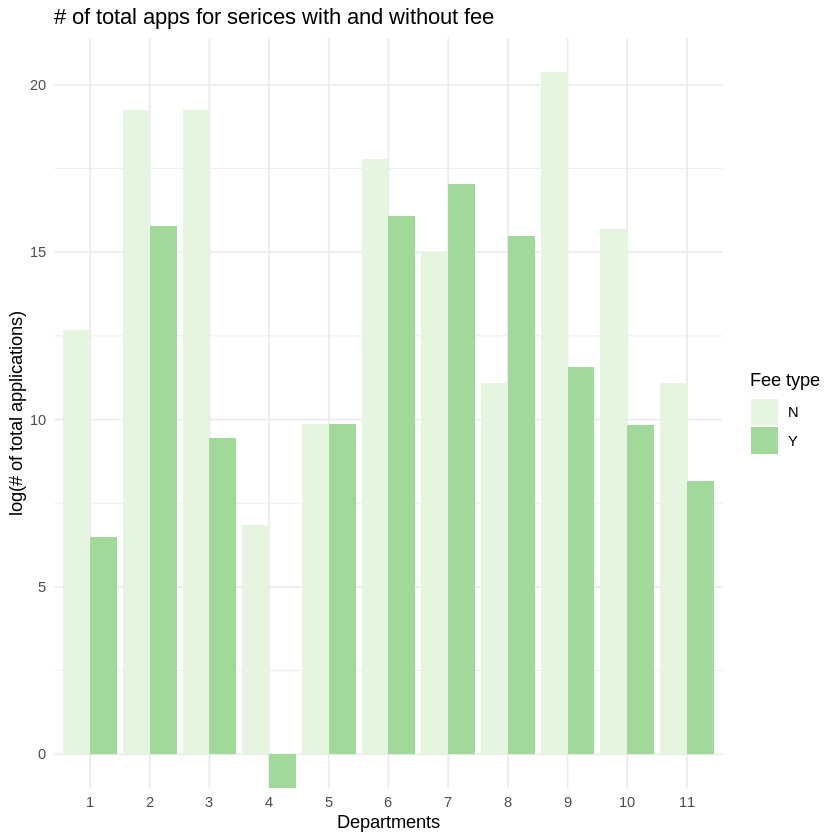

In [10]:
c=aggregate(data$sum, by=list(data$service_fee, data$department_name_en), FUN=sum, na.rm=TRUE)
row=c("Y","Canada School of Public Service",0)
cc=rbind(c[1:7,],row,c[8:21,])
cc$Group.2=as.factor(rep(seq_len(11), each=2))
cc$x=as.numeric(cc$x)
ggplot(cc, aes(x=Group.2, y=log(x), fill=Group.1))+ylab("log(# of total applications)")+xlab("Departments")+ggtitle("# of total apps for serices with and without fee")+geom_bar(stat="identity",position=position_dodge())+scale_fill_brewer(palette="Greens")+theme(legend.title = element_blank())+theme_minimal()+labs(fill = "Fee type")



In [7]:
unique(data$department_name_en)

[1] Agriculture and Agri-Food Canada                   
 [2] Canada Border Services Agency                      
 [3] Canadian Food Inspection Agency                    
 [4] Immigration, Refugees and Citizenship Canada       
 [5] Canada Revenue Agency                              
 [6] Canada School of Public Service                    
 [7] Employment and Social Development Canada           
 [8] Innovation, Science and Economic Development Canada
 [9] Public Services and Procurement Canada             
[10] Shared Services Canada                             
[11] Veterans Affairs Canada                            
67 Levels: Administrative Tribunals Support Service of Canada ...

In [8]:
# this part works in local but not in notebook
#how many services which are both applicable and e-enabled for each department?
e=data[which(data$e_application=="Y" & data$e_authentication=="Y" & data$e_decision=="Y" & data$e_feedback=="Y" & data$e_issuance=="Y" & data$e_registration=="Y"),c(1,3)]
count=matrix(0,11,2)
for(i in 1:11){
  for(j in 1:2){
    a=e[which(e$fiscal_yr==unique(data$fiscal_yr)[j]),2]
    count[i,j]=length(a[which(a==unique(data$department_name_en)[i])])
  }
}
colnames(count)=c("2016-2017","2017-2018")
rownames(count)=1:11
t=t(count)
t
barplot(t,main = "# of all e-enabled services in each dep over year", col = c("#33FF99","#0099FF"), beside = TRUE, xlab="Departments", ylab = "Number of services")
legend("topleft",c("2016-2017","2017-2018"),fill = c("#33FF99","#0099FF"))


Warning message in which(a == unique(data$department_name_en)[i]):
“Incompatible methods ("Ops.data.frame", "Ops.factor") for "=="”


ERROR: Error in a == unique(data$department_name_en)[i]: comparison of these types is not implemented
